# Use of the RoBERTa Notebook

This further notebook is going to be used to keep the main clean and unnecessarly long.

After RoBERTa baseline model has been implemented, I'm going to use a series of different notebooks based on different testing models.

For further information about my project please review the main notebook. 

In [22]:
#required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import nlp
import tensorflow as tf
from transformers import pipeline, AutoTokenizer

#setting to avoid truncation of the text rows

pd.set_option('display.max_colwidth', None)

In [23]:
#extracting data for the base emotions df

data = pd.read_csv('c:/Data_Science/IH_Notebooks/IH_NLP_Final_Project/text.csv')
emotion_df = data.copy()

emotion_df.head()

emotion_df = emotion_df.drop(columns='Unnamed: 0')

print("First 3 rows of emotion_df after column drop: \n", emotion_df.head(3))

First 3 rows of emotion_df after column drop: 
                                                                                                                                                                                                                                          text  \
0                                                                                                                                                                                               i just feel really helpless and heavy hearted   
1  ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing   
2                                                                                                                                                                             i gave up my internship with the dmrg and am feeling di

In [24]:
import re

#cleaning the text

from my_functions import clean_text

emotion_df['clean_text'] = emotion_df['text'].apply(clean_text)

In [25]:
emotion_df = emotion_df.drop(columns='text')

#moving the label column back on the right of the df

emotion_label_placeholder = emotion_df.pop('label')

emotion_df['label'] = emotion_label_placeholder

#Checking the results

print("First 3 rows of emotion_df: \n", emotion_df.head(3))

First 3 rows of emotion_df: 
                                                                                                                                                                                                                                    clean_text  \
0                                                                                                                                                                                               i just feel really helpless and heavy hearted   
1  ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing   
2                                                                                                                                                                             i gave up my internship with the dmrg and am feeling distraught   

   la

In [26]:
emotion_df = emotion_df.rename(columns={'clean_text': 'text'})
emotion_df

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing,0
2,i gave up my internship with the dmrg and am feeling distraught,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative,4
...,...,...
416804,i feel like telling these horny devils to find a site more suited to that sort of interest the playboy if there is one forum perhaps,2
416805,i began to realize that when i was feeling agitated or restless that i would have a thought to go do the dishes,3
416806,i feel very curious be why previous early dawn in the time here don t you seek his trouble,5
416807,i feel that becuase of the tyranical nature of the government in el salvador and the savage social conditions of the general people that the set of thought to run the shoe shop in miguel marmols testimoney was able to work,3


In [27]:
from sklearn.utils import resample

#resampling emotion_df to have 6000 rows

sadness = emotion_df.loc[emotion_df['label'] == 0]
joy = emotion_df.loc[emotion_df['label'] == 1]
love = emotion_df.loc[emotion_df['label'] == 2]
anger = emotion_df.loc[emotion_df['label'] == 3]
fear = emotion_df.loc[emotion_df['label'] == 4]
surprise = emotion_df.loc[emotion_df['label'] == 5]

undersampled_sadness = resample(sadness, replace=True, n_samples=1000, random_state=42)
undersampled_joy = resample(joy, replace=True, n_samples=1000, random_state=42)
undersampled_love = resample(love, replace=True, n_samples=1000, random_state=42)
undersampled_anger = resample(anger, replace=True, n_samples=1000, random_state=42)
undersampled_fear = resample(fear, replace=True, n_samples=1000, random_state=42)
undersampled_surprise = resample(surprise, replace=True, n_samples=1000, random_state=42)

dfs = [undersampled_sadness, undersampled_joy, undersampled_love, undersampled_anger, undersampled_fear, undersampled_surprise]

undersampled_emotion_df = pd.concat(dfs, ignore_index=True)

undersampled_emotion_df

,text,label
0,im feeling terrible,0
1,i am lbs overweight and the sudden burst of training has left me feeling dull and stale,0
2,i usually feel resigned that if i know it i know it if not it is too late now,0
3,i was a part of that group but i left due to feeling disheartened with my internet speed and lack of money to buy a second hand one and i created my own group for artipoppe virgins those who have never managed to bag one for themselves,0
4,i am so far from normal that it s not funny i just feel stupid and tiny and cheated,0
...,...,...
5995,i think is slowly killing me and feeling like crud i am surprised i made it to friday,5
5996,i started feeling flu ish i was pretty surprised,5
5997,i have used these opportunities to feel contempt disgust and shame about the others instead of truly being curious about what motivates their behavior and what are they are attempting to share about themselves,5
5998,im sick of being exhausted all the time of rushing around school of feeling dazed and repressed of not having time to see my friends because i have too much to do of worrying about grades of forcing myself to tolerate small talk,5


In [28]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

#setting the language to English
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mirko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def stopword_remove(text):
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text

undersampled_emotion_df['text'] = undersampled_emotion_df['text'].apply(stopword_remove)

# Baseline model

In [30]:
#RoBERTa base model

model = "j-hartmann/emotion-english-distilroberta-base"

roberta = pipeline("text-classification", model, return_all_scores=True)

#Tokenizer

tokenizer = AutoTokenizer.from_pretrained(model)

from transformers import TFAutoModelForSequenceClassification # will use the model for sequence classification

model = TFAutoModelForSequenceClassification.from_pretrained(model)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [31]:
def mooder(text):
    """
    This function will return the mood of the text
        returns_tensors="tf" will return the tokens as a TensorFlow tensor
        max_length=512 will limit the number of tokens to 512
        truncation=True will truncate the text if it exceeds the max_length
        padding="longest" will pad the text to the longest sequence in the batch
    """
    encoded_text = tokenizer(text, return_tensors="tf", max_length=512, truncation=True, padding="longest")
    output = model(encoded_text)
    scores = output.logits[0].numpy()
    moods = {
        "anger": scores[0],
        "joy": scores[1],
        "fear": scores[2],
        "love": scores[3],
        "surprise": scores[4],
        "sadness": scores[5]
    }

    max_mood = max(moods, key=moods.get)
    print(f"Your mood appear to be {max_mood}")

    if max_mood == 'joy':
        print(f"The detected emotion is {max_mood}. No further investigation required.")
    elif max_mood == 'anger':
        print(f"The detected emotion is {max_mood}. Further investigation required.")
    elif max_mood == 'fear':
        print(f"The detected emotion is {max_mood}. Further investigation may be required.")
    elif max_mood == 'love':
        print(f"The detected emotion is {max_mood}. No further investigation required.")
    elif max_mood == 'surprise':
        print(f"The detected emotion is {max_mood}. No further investigation required.")
    else:
        print(f"The detected emotion is {max_mood}. No further investigation required.")
    return moods

In [32]:
#creating a df from RoBERTa model

roberta_emotion_df = undersampled_emotion_df['text'].apply(mooder)

Your mood appear to be sadness
The detected emotion is sadness. No further investigation required.
Your mood appear to be sadness
The detected emotion is sadness. No further investigation required.
Your mood appear to be sadness
The detected emotion is sadness. No further investigation required.
Your mood appear to be sadness
The detected emotion is sadness. No further investigation required.
Your mood appear to be sadness
The detected emotion is sadness. No further investigation required.
Your mood appear to be sadness
The detected emotion is sadness. No further investigation required.
Your mood appear to be sadness
The detected emotion is sadness. No further investigation required.
Your mood appear to be sadness
The detected emotion is sadness. No further investigation required.
Your mood appear to be sadness
The detected emotion is sadness. No further investigation required.
Your mood appear to be sadness
The detected emotion is sadness. No further investigation required.
Your mood 

In [33]:
roberta_emotion_df = roberta_emotion_df.reset_index()

roberta_scores = pd.json_normalize(roberta_emotion_df['text'])

roberta_scores

,anger,joy,fear,love,surprise,sadness
0,-1.877982,-1.503368,-0.210400,-1.417968,-0.774008,5.451229
1,-1.258481,-0.649227,-1.800393,-1.653708,-0.210059,4.908133
2,-0.254374,-1.600118,-0.452068,-0.899185,0.039730,4.676746
3,-0.245380,-1.652004,-2.245646,-1.048536,-0.858957,5.491189
4,0.263320,-1.734208,-1.807891,-0.540051,-1.061735,4.898928
...,...,...,...,...,...,...
5995,-0.196003,-1.714313,-1.119450,-0.374520,-0.405350,-0.738982
5996,-0.372648,-1.863707,-0.812923,-0.389652,-0.141950,-1.097010
5997,1.760193,5.068670,-1.500096,-2.120051,-0.547077,-1.074798
5998,0.144753,-1.813412,0.549282,-0.958278,-0.965979,-1.335033


In [34]:
def normalize_logits(row):
      scores = np.exp(row)
      return scores / scores.sum()

normalized_scores = roberta_scores.apply(normalize_logits, axis= 1)
normalized_scores.head()

,anger,joy,fear,love,surprise,sadness
0,0.000651,0.000947,0.003449,0.001031,0.001963,0.991960
1,0.002068,0.003804,0.001203,0.001393,0.005901,0.985632
2,0.007018,0.001827,0.005759,0.003683,0.009418,0.972294
3,0.003201,0.000784,0.000433,0.001434,0.001733,0.992414
4,0.009518,0.001291,0.001200,0.004262,0.002530,0.981199


In [35]:
emotion_score_df = pd.concat([undersampled_emotion_df, roberta_scores], axis=1)

emotion_score_df

,text,label,anger,joy,fear,love,surprise,sadness
0,im feeling terrible,0,-1.877982,-1.503368,-0.210400,-1.417968,-0.774008,5.451229
1,lbs overweight sudden burst training left feeling dull stale,0,-1.258481,-0.649227,-1.800393,-1.653708,-0.210059,4.908133
2,usually feel resigned know know late,0,-0.254374,-1.600118,-0.452068,-0.899185,0.039730,4.676746
3,part group left due feeling disheartened internet speed lack money buy second hand one created group artipoppe virgins never managed bag one,0,-0.245380,-1.652004,-2.245646,-1.048536,-0.858957,5.491189
4,far normal funny feel stupid tiny cheated,0,0.263320,-1.734208,-1.807891,-0.540051,-1.061735,4.898928
...,...,...,...,...,...,...,...,...
5995,think slowly killing feeling like crud surprised made friday,5,-0.196003,-1.714313,-1.119450,-0.374520,-0.405350,-0.738982
5996,started feeling flu ish pretty surprised,5,-0.372648,-1.863707,-0.812923,-0.389652,-0.141950,-1.097010
5997,used opportunities feel contempt disgust shame others instead truly curious motivates behavior attempting share,5,1.760193,5.068670,-1.500096,-2.120051,-0.547077,-1.074798
5998,im sick exhausted time rushing around school feeling dazed repressed time see friends much worrying grades forcing tolerate small talk,5,0.144753,-1.813412,0.549282,-0.958278,-0.965979,-1.335033


In [36]:
#adding column to show main emotion

emotion_col = ['anger', 'joy', 'fear', 'love', 'surprise', 'sadness']

emotion_score_df['main_emotion'] = emotion_score_df[emotion_col].idxmax(axis=1)

emotion_score_df

,text,label,anger,joy,fear,love,surprise,sadness,main_emotion
0,im feeling terrible,0,-1.877982,-1.503368,-0.210400,-1.417968,-0.774008,5.451229,sadness
1,lbs overweight sudden burst training left feeling dull stale,0,-1.258481,-0.649227,-1.800393,-1.653708,-0.210059,4.908133,sadness
2,usually feel resigned know know late,0,-0.254374,-1.600118,-0.452068,-0.899185,0.039730,4.676746,sadness
3,part group left due feeling disheartened internet speed lack money buy second hand one created group artipoppe virgins never managed bag one,0,-0.245380,-1.652004,-2.245646,-1.048536,-0.858957,5.491189,sadness
4,far normal funny feel stupid tiny cheated,0,0.263320,-1.734208,-1.807891,-0.540051,-1.061735,4.898928,sadness
...,...,...,...,...,...,...,...,...,...
5995,think slowly killing feeling like crud surprised made friday,5,-0.196003,-1.714313,-1.119450,-0.374520,-0.405350,-0.738982,anger
5996,started feeling flu ish pretty surprised,5,-0.372648,-1.863707,-0.812923,-0.389652,-0.141950,-1.097010,surprise
5997,used opportunities feel contempt disgust shame others instead truly curious motivates behavior attempting share,5,1.760193,5.068670,-1.500096,-2.120051,-0.547077,-1.074798,joy
5998,im sick exhausted time rushing around school feeling dazed repressed time see friends much worrying grades forcing tolerate small talk,5,0.144753,-1.813412,0.549282,-0.958278,-0.965979,-1.335033,fear


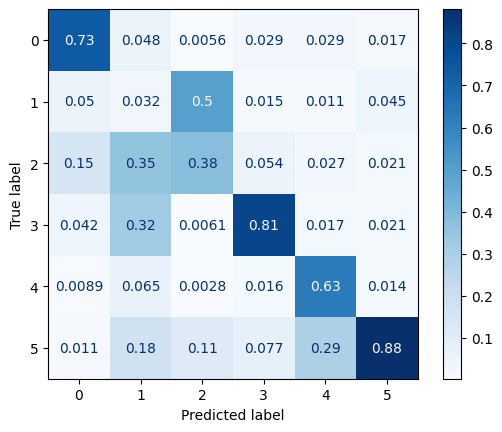

In [37]:
#remapping main emotion to match label and create the confusion matrix

score_map = {
    'sadness': 0,
    'joy': 1,
    'love': 2,
    'anger': 3,
    'fear': 4,
    'surprise': 5 
}

emotion_score_df['main_emotion'] = emotion_score_df['main_emotion'].map(score_map)

y_true = emotion_score_df['label']
y_pred = emotion_score_df['main_emotion']

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred, normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# BERT model

In [38]:
bert_model = 'bhadresh-savani/bert-base-go-emotion'

bert = pipeline("text-classification", bert_model, return_all_scores=True)

#Tokenizer

tokenizer = AutoTokenizer.from_pretrained(bert_model)

from transformers import TFAutoModelForSequenceClassification # will use the model for sequence classification

model = TFAutoModelForSequenceClassification.from_pretrained(bert_model)

ValueError: Could not load model bhadresh-savani/bert-base-go-emotion with any of the following classes: (<class 'transformers.models.auto.modeling_tf_auto.TFAutoModelForSequenceClassification'>,). See the original errors:

while loading with TFAutoModelForSequenceClassification, an error is thrown:
Traceback (most recent call last):
  File "c:\Data_Science\IH_Notebooks\IH_NLP_Final_Project\emovenv\lib\site-packages\transformers\pipelines\base.py", line 289, in infer_framework_load_model
    model = model_class.from_pretrained(model, **kwargs)
  File "c:\Data_Science\IH_Notebooks\IH_NLP_Final_Project\emovenv\lib\site-packages\transformers\models\auto\auto_factory.py", line 564, in from_pretrained
    return model_class.from_pretrained(
  File "c:\Data_Science\IH_Notebooks\IH_NLP_Final_Project\emovenv\lib\site-packages\transformers\modeling_tf_utils.py", line 2873, in from_pretrained
    raise EnvironmentError(
OSError: bhadresh-savani/bert-base-go-emotion does not appear to have a file named tf_model.h5 but there is a file for PyTorch weights. Use `from_pt=True` to load this model from those weights.




In [ ]:
#creating a df from RoBERTa model

twitter_emotion_df = undersampled_emotion_df['text'].apply(mooder)